In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/virgileaudi/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [25]:
# Loading data
with h5py.File('../plot_scores.hdf5', "r") as f:
    # format is (alpha_w, alpha_c, f, precision, recall)
    scores = np.array(f.get('scores'))

In [26]:
np.max(scores[:,2])

0.80794436271231773

In [27]:
print 'Best alpha_w ',scores[:,0][np.argmax(scores[:,2])]
print 'Best alpha_c ',scores[:,1][np.argmax(scores[:,2])]

Best alpha_w  0.1
Best alpha_c  8.0


In [28]:
best_w_ind = np.where(scores[:,0] == scores[:,0][np.argmax(scores[:,2])])
best_c_ind = np.where(scores[:,1] == scores[:,1][np.argmax(scores[:,2])])

In [29]:
scores[best_w_ind,3][0]

array([ 0.76077641,  0.76102293,  0.76092707,  0.76070529,  0.76057935,
        0.76006036,  0.76009053])

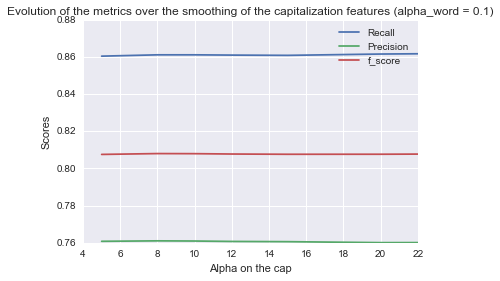

In [35]:
plt.plot(scores[best_w_ind, 1][0], scores[best_w_ind,4][0], label='Recall')
plt.plot(scores[best_w_ind, 1][0], scores[best_w_ind,3][0], label='Precision')
plt.plot(scores[best_w_ind, 1][0], scores[best_w_ind,2][0], label='f_score')
#plt.xticks(scores[best_w, 1][0])
plt.title("Evolution of the metrics over the smoothing of the capitalization features (alpha_word = 0.1)")
plt.ylabel('Scores')
plt.xlabel('Alpha on the cap')
plt.legend()
plt.show()

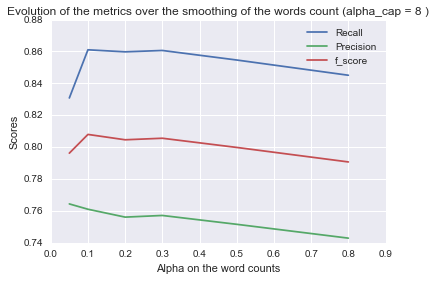

In [36]:
plt.plot(scores[best_c_ind, 0][0], scores[best_c_ind,4][0], label='Recall')
plt.plot(scores[best_c_ind, 0][0], scores[best_c_ind,3][0], label='Precision')
plt.plot(scores[best_c_ind, 0][0], scores[best_c_ind,2][0], label='f_score')
#plt.xticks(scores[best_w, 1][0])
plt.title("Evolution of the metrics over the smoothing of the words count (alpha_cap = 8 )")
plt.ylabel('Scores')
plt.xlabel('Alpha on the word counts')
plt.legend()
plt.show()

In [22]:
with h5py.File('toplot_2', "r") as f:
    # format is (alpha_w, alpha_c, f, precision, recall)
    loss1 = list(np.array(f.get('loss1')))
    loss2 = list(np.array(f.get('loss2')))
    loss3 = list(np.array(f.get('loss3')))
    loss4 = list(np.array(f.get('loss4')))
    loss5 = list(np.array(f.get('loss5')))
    loss6 = list(np.array(f.get('loss6')))

In [18]:
loss3.extend(loss4)

In [20]:
loss3.extend(loss5)
loss3.extend(loss6)

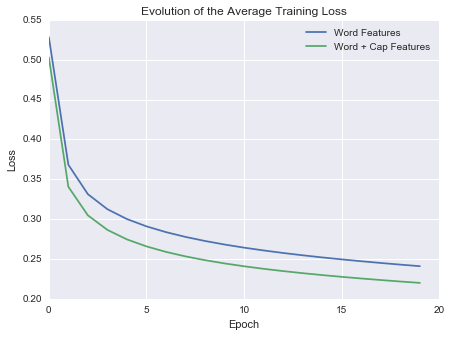

In [32]:
plt.figure(figsize=(7,5))
plt.plot(range(len(loss1)), loss1, label='Word Features')
plt.plot(range(len(loss3)), loss3, label='Word + Cap Features')
plt.title('Evolution of the Average Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [33]:
cap_score = [0.854,0.802,0.827]
nocap_score = [0.842, 0.783, 0.812]

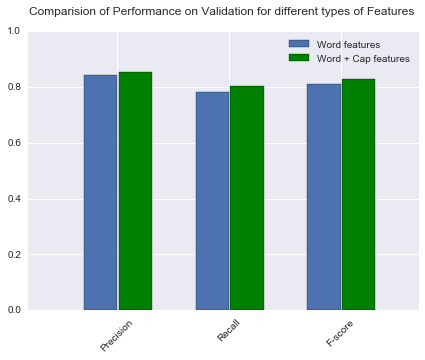

In [57]:
plt.figure(figsize=(7,5))
plt.bar(np.arange(3)+0.5,nocap_score, 0.3, label = 'Word features')
plt.bar(np.arange(3)+0.31 +0.5,cap_score, 0.3, label = 'Word + Cap features', color= 'green')
xTickMarks = ['Precision', 'Recall', 'F-score']
plt.xticks(np.arange(3)+0.3 + 0.5,xTickMarks, rotation=45, fontsize=10)
plt.xlim(0,3.5)
plt.ylim(0,1)
plt.legend()
plt.title('Comparision of Performance on Validation for different types of Features \n')
plt.show()